In [121]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [143]:
# Fuzzification
data_redundancy = ctrl.Antecedent(np.arange(0,11,1),'data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 11, 1),'degradation_level')
error_history = ctrl.Antecedent(np.arange(0, 26, 1),'error_history')

In [144]:
# Membership functions
data_redundancy['low'] = fuzz.trimf(data_redundancy.universe,[0, 0, 15])
data_redundancy['medium'] = fuzz.trimf(data_redundancy.universe,[0,15,30])
data_redundancy['high'] = fuzz.trimf(data_redundancy.universe,[15,30,30])

degradation_level['low'] = fuzz.trimf(degradation_level.universe,[0, 0, 15])
degradation_level['medium'] = fuzz.trimf(degradation_level.universe,[0,15,30])
degradation_level['high'] = fuzz.trimf(degradation_level.universe,[15,30,30])

error_history['low'] = fuzz.trimf(error_history.universe,[0, 0, 15])
error_history['medium'] = fuzz.trimf(error_history.universe,[0,15,30])
error_history['high'] = fuzz.trimf(error_history.universe,[15,30,30])

In [153]:
# Output variable
error_likelihood = ctrl.Consequent(np.arange(0, 31, 1), 'error_likelihood')
error_mitigation = ctrl.Consequent(np.arange(0, 31, 1), 'error_mitigation')

In [154]:
# Membership functions for the output
error_likelihood['low'] = fuzz.trimf(error_likelihood.universe, [0, 0, 15])
error_likelihood['medium'] = fuzz.trimf(error_likelihood.universe, [0,15,30])
error_likelihood['high'] = fuzz.trimf(error_likelihood.universe, [15,30,30])

# Membership Function for mitigation
error_mitigation['replication'] = fuzz.trimf(error_mitigation.universe, [0, 0, 20])
error_mitigation['masking'] = fuzz.trimf(error_mitigation.universe, [0,20,45])
error_mitigation['recovery'] = fuzz.trimf(error_mitigation.universe, [20,45,45])

In [157]:
# Rules for output

rule1 = ctrl.Rule(data_redundancy['high'] & degradation_level['low'] & error_history['medium'], error_likelihood['medium'])
rule2 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history['low'], error_likelihood['medium'])
rule3 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history['high'], error_likelihood['high'])
rule4 = ctrl.Rule(data_redundancy['high'] & degradation_level['high'] & error_history['high'], error_likelihood['high'])
rule5 = ctrl.Rule(data_redundancy['low'] & degradation_level['low'] & error_history['low'], error_likelihood['low'])
rule6 = ctrl.Rule(data_redundancy['low'] & degradation_level['low'] & error_history['medium'], error_likelihood['low'])

mitigation_rule1 = ctrl.Rule(data_redundancy['low'] &  degradation_level['low'] & error_history['low'], error_mitigation['replication'])
mitigation_rule2 = ctrl.Rule(data_redundancy['medium'] &  degradation_level['medium'] & error_history['medium'], error_mitigation['masking'])
mitigation_rule3 = ctrl.Rule(data_redundancy['high'] &  degradation_level['high'] & error_history['high'], error_mitigation['recovery'])

In [158]:
error_detection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
error_detection = ctrl.ControlSystemSimulation(error_detection_ctrl)

error_mitigation_ctrl = ctrl.ControlSystem([mitigation_rule1, mitigation_rule2, mitigation_rule3])
error_mitigation = ctrl.ControlSystemSimulation(error_mitigation_ctrl)

Error Likelihood: 14.215686274509808


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


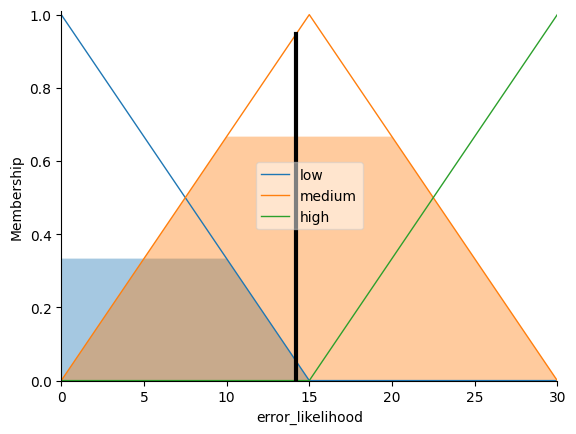

In [159]:
error_detection.input['data_redundancy'] = 10
error_detection.input['degradation_level'] = 20
error_detection.input['error_history'] = 5

error_detection.compute()

output_error_likelihood = error_detection.output['error_likelihood']

print("Error Likelihood:", output_error_likelihood)
error_likelihood.view(sim=error_detection)

In [150]:
error_mitigation.input['data_redundancy'] = 10
error_mitigation.input['degradation_level'] = 20
error_mitigation.input['error_history'] = 5

In [161]:
error_mitigation.compute()
output_mitigation = error_mitigation.output['error_mitigation']
print("Error Mitigation:", output_mitigation)


Error Mitigation: 14.999999999999998
